In [2]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx

#Change 01 - Change file_path and target as per the dataset
file_path = "/content/loan_sanction_train.csv"
target_col = "Loan_Status"
df = pd.read_csv(file_path)

#ONLY FOR RED WINE (to increase its accuracy) (optional hy)
#df['quality'] = df['quality'].apply(lambda x: 'low' if x <= 4 else 'medium' if x <= 6 else 'high')

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=[target_col])
y = df[target_col]

impute = SimpleImputer(strategy="mean")
X = impute.fit_transform(X)

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=22)

bayes = GaussianNB()
bayes.fit(X_train, y_train)

y_pred = bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")


# Bayesian Network
#CHANGE 02
# breast cancer --> features = ['radius_mean', 'texture_mean']
# red wine --> features = ['alcohol', 'volatile acidity']
features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
structure = [(feature, target_col) for feature in features]
naive_bayes = BayesianNetwork(structure)

naive_bayes.fit(df, estimator=MaximumLikelihoodEstimator)

# CPDs
print("\nConditional Probability Distributions (CPDs):")
for cpd in naive_bayes.get_cpds():
    print(f"CPD of {cpd.variable}:")
    print(cpd)

# Inference
infer = VariableElimination(naive_bayes)
#CHANGE 03
# breast cancer --> query_result = infer.query(variables=['diagnosis'], evidence={'radius_mean': 17.99})
#red wine --> query_result = infer.query(variables=['quality'], evidence={'volatile acidity': 0.80})
query_result = infer.query(variables=['Loan_Status'], evidence={'Credit_History': 1.0, 'Education': 0})
print("\nQuery Result:")
print(query_result)

# Visualization
def plot_dag(model):
    pos = nx.spring_layout(model)
    nx.draw(model, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
    plt.title("Bayesian Network DAG", fontsize=14)
    plt.show()

dag = nx.DiGraph(naive_bayes.edges())
plot_dag(dag)

Naive Bayes Accuracy: 0.8049

Conditional Probability Distributions (CPDs):
CPD of Gender:
+-----------+-----------+
| Gender(0) | 0.18241   |
+-----------+-----------+
| Gender(1) | 0.796417  |
+-----------+-----------+
| Gender(2) | 0.0211726 |
+-----------+-----------+
CPD of Loan_Status:
+----------------+---------------------+-----+---------------------+---------------------+
| Credit_History | Credit_History(0.0) | ... | Credit_History(1.0) | Credit_History(1.0) |
+----------------+---------------------+-----+---------------------+---------------------+
| Education      | Education(0)        | ... | Education(1)        | Education(1)        |
+----------------+---------------------+-----+---------------------+---------------------+
| Gender         | Gender(0)           | ... | Gender(2)           | Gender(2)           |
+----------------+---------------------+-----+---------------------+---------------------+
| Married        | Married(0)          | ... | Married(2)          | M

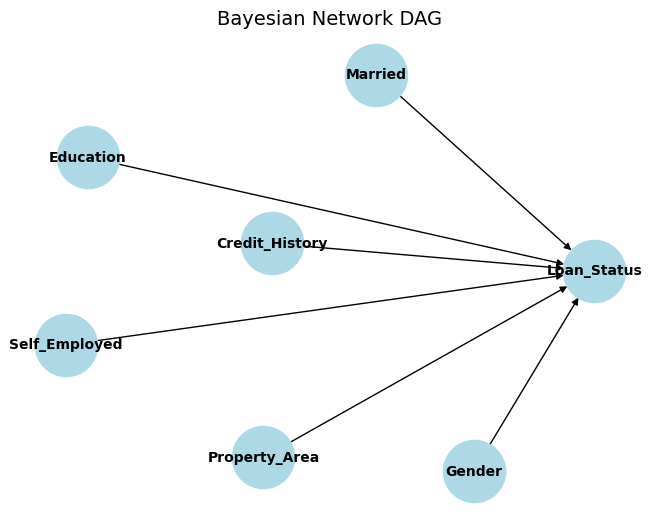

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx

file_path = "/content/loan_sanction_train.csv"
target_col = "Loan_Status"  # Replace 'target'

df = pd.read_csv(file_path)
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=[target_col])
y = df[target_col]

impute = SimpleImputer(strategy="mean")
X = impute.fit_transform(X)

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=22)

bayes = GaussianNB()
bayes.fit(X_train, y_train)

y_pred = bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")



# Bayesian Network
features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
structure = [(feature, target_col) for feature in features]
naive_bayes = BayesianNetwork(structure)

naive_bayes.fit(df, estimator=MaximumLikelihoodEstimator)

# CPDs
print("\nConditional Probability Distributions (CPDs):")
for cpd in naive_bayes.get_cpds():
    print(f"CPD of {cpd.variable}:")
    print(cpd)

# Inference
infer = VariableElimination(naive_bayes)
query_result = infer.query(variables=['Loan_Status'], evidence={'Credit_History': 1.0, 'Education': 0})
print("\nQuery Result:")
print(query_result)

# Visualization
def plot_dag(model):
    pos = nx.spring_layout(model)
    nx.draw(model, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
    plt.title("Bayesian Network DAG", fontsize=14)
    plt.show()

dag = nx.DiGraph(naive_bayes.edges())
plot_dag(dag)


Naive Bayes Accuracy: 0.9649

Conditional Probability Distributions (CPDs):
CPD of radius_mean:
+--------------------+------------+
| radius_mean(6.981) | 0.00175747 |
+--------------------+------------+
| radius_mean(7.691) | 0.00175747 |
+--------------------+------------+
| radius_mean(7.729) | 0.00175747 |
+--------------------+------------+
| radius_mean(7.76)  | 0.00175747 |
+--------------------+------------+
| radius_mean(8.196) | 0.00175747 |
+--------------------+------------+
| radius_mean(8.219) | 0.00175747 |
+--------------------+------------+
| radius_mean(8.571) | 0.00175747 |
+--------------------+------------+
| radius_mean(8.597) | 0.00175747 |
+--------------------+------------+
| radius_mean(8.598) | 0.00175747 |
+--------------------+------------+
| radius_mean(8.618) | 0.00175747 |
+--------------------+------------+
| radius_mean(8.671) | 0.00175747 |
+--------------------+------------+
| radius_mean(8.726) | 0.00175747 |
+--------------------+------------+
| ra

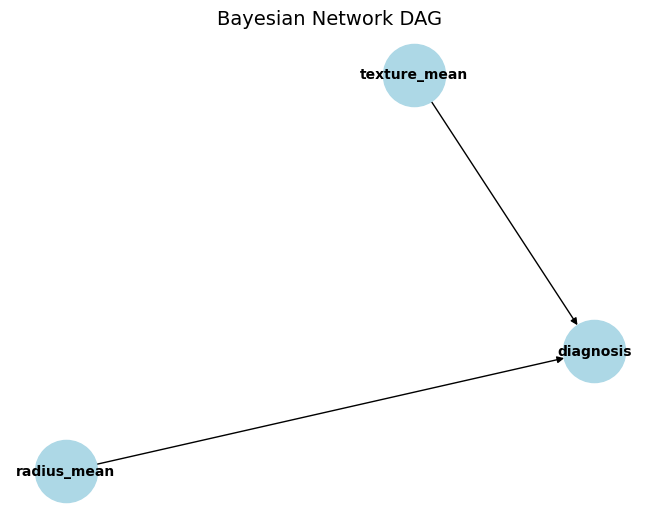

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx

file_path = "/content/breast-cancer.csv"
target_col = "diagnosis"  # Replace 'target' (CHANGE 1)

df = pd.read_csv(file_path)
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=[target_col])
y = df[target_col]

impute = SimpleImputer(strategy="mean")
X = impute.fit_transform(X)

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=22)

bayes = GaussianNB()
bayes.fit(X_train, y_train)

y_pred = bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")


# Bayesian Network
features = ['radius_mean', 'texture_mean'] #CHANGE 2
structure = [(feature, target_col) for feature in features]
naive_bayes = BayesianNetwork(structure)

naive_bayes.fit(df, estimator=MaximumLikelihoodEstimator)

# CPDs
print("\nConditional Probability Distributions (CPDs):")
for cpd in naive_bayes.get_cpds():
    print(f"CPD of {cpd.variable}:")
    print(cpd)

# Inference
infer = VariableElimination(naive_bayes)
query_result = infer.query(variables=['diagnosis'], evidence={'radius_mean': 17.99}) #CHANGE 3
print("\nQuery Result:")
print(query_result)

# Visualization
def plot_dag(model):
    pos = nx.spring_layout(model)
    nx.draw(model, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
    plt.title("Bayesian Network DAG", fontsize=14)
    plt.show()

dag = nx.DiGraph(naive_bayes.edges())
plot_dag(dag)


Naive Bayes Accuracy: 0.8000

Conditional Probability Distributions (CPDs):
CPD of alcohol:
+-----------------------------+-------------+
| alcohol(8.4)                | 0.00125078  |
+-----------------------------+-------------+
| alcohol(8.5)                | 0.000625391 |
+-----------------------------+-------------+
| alcohol(8.7)                | 0.00125078  |
+-----------------------------+-------------+
| alcohol(8.8)                | 0.00125078  |
+-----------------------------+-------------+
| alcohol(9.0)                | 0.0187617   |
+-----------------------------+-------------+
| alcohol(9.05)               | 0.000625391 |
+-----------------------------+-------------+
| alcohol(9.1)                | 0.014384    |
+-----------------------------+-------------+
| alcohol(9.2)                | 0.0450281   |
+-----------------------------+-------------+
| alcohol(9.23333333333333)   | 0.000625391 |
+-----------------------------+-------------+
| alcohol(9.25)               | 0.

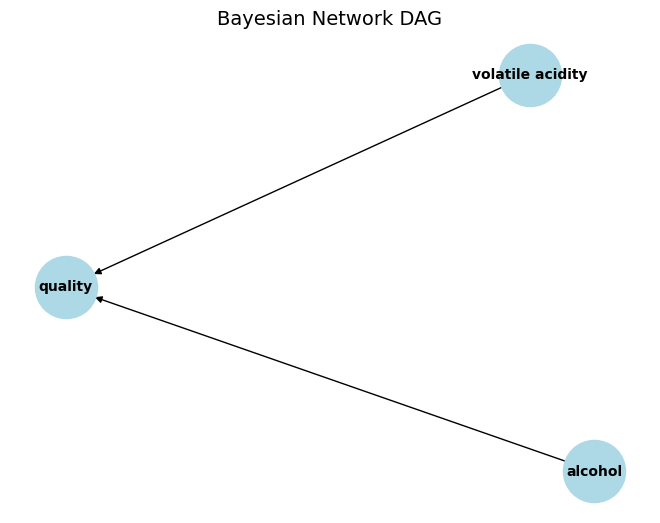

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx

file_path = "/content/winequality-red.csv"
target_col = "quality"  # Replace 'target' (CHANGE 1)

df = pd.read_csv(file_path)
df['quality'] = df['quality'].apply(lambda x: 'low' if x <= 4 else 'medium' if x <= 6 else 'high')

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=[target_col])
y = df[target_col]

impute = SimpleImputer(strategy="mean")
X = impute.fit_transform(X)

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=22)

bayes = GaussianNB()
bayes.fit(X_train, y_train)

y_pred = bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")


# Bayesian Network
features = ['alcohol', 'volatile acidity'] #CHANGE 2
structure = [(feature, target_col) for feature in features]
naive_bayes = BayesianNetwork(structure)

naive_bayes.fit(df, estimator=MaximumLikelihoodEstimator)

# CPDs
print("\nConditional Probability Distributions (CPDs):")
for cpd in naive_bayes.get_cpds():
    print(f"CPD of {cpd.variable}:")
    print(cpd)

# Inference
infer = VariableElimination(naive_bayes)
query_result = infer.query(variables=['quality'], evidence={'volatile acidity': 0.80}) #CHANGE 3
print("\nQuery Result:")
print(query_result)

# Visualization
def plot_dag(model):
    pos = nx.spring_layout(model)
    nx.draw(model, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
    plt.title("Bayesian Network DAG", fontsize=14)
    plt.show()

dag = nx.DiGraph(naive_bayes.edges())
plot_dag(dag)
